In [38]:
import sys
import pickle
import pandas as pd
import numpy as np
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# 载入数据
data_dict = pickle.load(open("final_project_dataset.pkl", "r") ) 
data_df = pd.DataFrame(data_dict)

In [3]:
data_df.head(10)

,ALLEN PHILLIP K,BADUM JAMES P,BANNANTINE JAMES M,BAXTER JOHN C,BAY FRANKLIN R,BAZELIDES PHILIP J,BECK SALLY W,BELDEN TIMOTHY N,BELFER ROBERT,BERBERIAN DAVID,...,WASAFF GEORGE,WESTFAHL RICHARD K,WHALEY DAVID A,WHALLEY LAWRENCE G,WHITE JR THOMAS E,WINOKUR JR. HERBERT S,WODRASKA JOHN,WROBEL BRUCE,YEAGER F SCOTT,YEAP SOON
bonus,4175000,NaN,NaN,1200000,400000,NaN,700000,5249999,NaN,NaN,...,325000,NaN,NaN,3000000,450000,NaN,NaN,NaN,NaN,NaN
deferral_payments,2869717,178980,NaN,1295738,260455,684694,NaN,2144013,-102500,NaN,...,831299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deferred_income,-3081055,NaN,-5104,-1386055,-201641,NaN,NaN,-2334434,NaN,NaN,...,-583325,-10800,NaN,NaN,NaN,-25000,NaN,NaN,NaN,NaN
director_fees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3285,NaN,...,NaN,NaN,NaN,NaN,NaN,108579,NaN,NaN,NaN,NaN
email_address,phillip.allen@enron.com,NaN,james.bannantine@enron.com,NaN,frank.bay@enron.com,NaN,sally.beck@enron.com,tim.belden@enron.com,NaN,david.berberian@enron.com,...,george.wasaff@enron.com,dick.westfahl@enron.com,NaN,greg.whalley@enron.com,thomas.white@enron.com,NaN,john.wodraska@enron.com,NaN,scott.yeager@enron.com,NaN
exercised_stock_options,1729541,257817,4046157,6680544,NaN,1599641,NaN,953136,3285,1624396,...,1668260,NaN,98718,3282960,1297049,NaN,NaN,139130,8308552,192758
expenses,13868,3486,56301,11200,129142,NaN,37172,17355,NaN,11892,...,NaN,51870,NaN,57838,81353,1413,NaN,NaN,53947,55097
from_messages,2195,NaN,29,NaN,NaN,NaN,4343,484,NaN,NaN,...,30,NaN,NaN,556,NaN,NaN,NaN,NaN,NaN,NaN
from_poi_to_this_person,47,NaN,39,NaN,NaN,NaN,144,228,NaN,NaN,...,22,NaN,NaN,186,NaN,NaN,NaN,NaN,NaN,NaN
from_this_person_to_poi,65,NaN,0,NaN,NaN,NaN,386,108,NaN,NaN,...,7,NaN,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
person_df=data_df.transpose()

In [5]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [6]:
person_df.isnull()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BADUM JAMES P,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BANNANTINE JAMES M,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BAXTER JOHN C,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BAY FRANKLIN R,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BAZELIDES PHILIP J,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BECK SALLY W,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BELDEN TIMOTHY N,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BELFER ROBERT,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BERBERIAN DAVID,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
np.any(person_df.isnull())

False

In [8]:
person_df.replace('NaN',np.nan,inplace=True)

In [9]:
person_df.isnull()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
BADUM JAMES P,True,False,True,True,True,False,False,True,True,True,...,True,True,False,True,True,True,True,True,False,False
BANNANTINE JAMES M,True,True,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
BAXTER JOHN C,False,False,False,True,True,False,False,True,True,True,...,False,False,False,False,True,False,True,True,False,False
BAY FRANKLIN R,False,False,False,True,False,True,False,True,True,True,...,True,False,False,False,False,False,True,True,False,False
BAZELIDES PHILIP J,True,False,True,True,True,False,True,True,True,True,...,False,False,False,True,True,False,True,True,False,False
BECK SALLY W,False,True,True,True,False,True,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELDEN TIMOTHY N,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
BELFER ROBERT,True,False,True,False,True,False,True,True,True,True,...,True,True,False,True,False,True,True,True,False,False
BERBERIAN DAVID,True,True,True,True,False,False,False,True,True,True,...,True,True,False,False,True,False,True,True,False,False


In [10]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
email_address                111 non-null object
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        93 non-null float64
poi                          146 non-null bool
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64

In [11]:
person_df.head(5)

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,304805.0,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,NaN,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,NaN,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0


In [12]:
total=person_df.query('index=="TOTAL"')

In [13]:
person_df.drop(['TOTAL'],inplace=True)

In [14]:
person_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        81 non-null float64
deferral_payments            38 non-null float64
deferred_income              48 non-null float64
director_fees                16 non-null float64
email_address                111 non-null object
exercised_stock_options      101 non-null float64
expenses                     94 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                3 non-null float64
long_term_incentive          65 non-null float64
other                        92 non-null float64
poi                          145 non-null bool
restricted_stock             109 non-null float64
restricted_stock_deferred    17 non-null float64
salary                       94 non-null float64
shared_receipt_with_poi      86 non-null float64

In [15]:
person_df['poi'].value_counts()

False    127
True      18
Name: poi, dtype: int64

In [16]:
person_df['exercised_stock_options'].sort_values(ascending=False)

LAY KENNETH L                    34348384.0
HIRKO JOSEPH                     30766064.0
RICE KENNETH D                   19794175.0
SKILLING JEFFREY K               19250000.0
PAI LOU L                        15364167.0
FREVERT MARK A                   10433518.0
DERRICK JR. JAMES V               8831913.0
YEAGER F SCOTT                    8308552.0
DIMICHELE RICHARD G               8191755.0
REDMOND BRIAN L                   7509039.0
BAXTER JOHN C                     6680544.0
HANNON KEVIN P                    5538001.0
OVERDYKE JR JERE C                5266578.0
HORTON STANLEY C                  5210569.0
CHRISTODOULOU DIOMEDES            5127155.0
ELLIOTT STEVEN                    4890344.0
THORN TERENCE H                   4452476.0
WALLS JR ROBERT H                 4346544.0
REYNOLDS LAWRENCE                 4160672.0
LAVORATO JOHN J                   4158995.0
BANNANTINE JAMES M                4046157.0
WHALLEY LAWRENCE G                3282960.0
TAYLOR MITCHELL S               

In [17]:
person_df['exercised_stock_options']['PRENTICE JAMES']+person_df['restricted_stock']['PRENTICE JAMES']

1095040.0

In [18]:
person_df['from_this_person_to_poi']['COLWELL WESLEY']

11.0

In [19]:
person_df['exercised_stock_options']['SKILLING JEFFREY K']

19250000.0

In [20]:
person_df['total_payments'].sort_values(ascending=False)

LAY KENNETH L              103559793.0
FREVERT MARK A              17252530.0
BHATNAGAR SANJAY            15456290.0
LAVORATO JOHN J             10425757.0
SKILLING JEFFREY K           8682716.0
MARTIN AMANDA K              8407016.0
BAXTER JOHN C                5634343.0
BELDEN TIMOTHY N             5501630.0
DELAINEY DAVID W             4747979.0
WHALLEY LAWRENCE G           4677574.0
ALLEN PHILLIP K              4484442.0
SHERRIFF JOHN R              4335388.0
MCMAHON JEFFREY              4099771.0
HAEDICKE MARK E              3859065.0
FALLON JAMES B               3676340.0
KITCHEN LOUISE               3471141.0
MULLER MARK S                3202070.0
HORTON STANLEY C             3131860.0
PAI LOU L                    3123383.0
HUMPHREY GENE E              3100224.0
SHANKMAN JEFFREY A           3038702.0
ECHOLS JOHN B                2692324.0
BOWEN JR RAYMOND M           2669589.0
LEFF DANIEL P                2664228.0
KOPPER MICHAEL J             2652612.0
FASTOW ANDREW S          

In [21]:
len(person_df.query('salary!="NaN"'))

94

In [22]:
# person_df.query('email_address.isnull()')
# person_df['email_address'].describe()
person_df.loc[person_df["email_address"].isnull()]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,1586055.0,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAZELIDES PHILIP J,NaN,684694.0,NaN,NaN,NaN,1599641.0,NaN,NaN,NaN,NaN,...,93750.0,874.0,False,NaN,NaN,80818.0,NaN,NaN,860136.0,1599641.0
BELFER ROBERT,NaN,-102500.0,NaN,3285.0,NaN,3285.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093.0,NaN,NaN,NaN,102500.0,-44093.0
BLAKE JR. NORMAN P,NaN,NaN,-113784.0,113784.0,NaN,NaN,1279.0,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1279.0,NaN
CHAN RONNIE,NaN,NaN,-98784.0,98784.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN
CLINE KENNETH W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,662086.0,-472568.0,NaN,NaN,NaN,NaN,189518.0
CUMBERLAND MICHAEL S,325000.0,NaN,NaN,NaN,NaN,NaN,22344.0,NaN,NaN,NaN,...,275000.0,713.0,False,207940.0,NaN,184899.0,NaN,NaN,807956.0,207940.0
DUNCAN JOHN H,NaN,NaN,-25000.0,102492.0,NaN,371750.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,77492.0,371750.0
FUGH JOHN L,NaN,50591.0,NaN,NaN,NaN,176378.0,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,50591.0,176378.0


In [23]:
len(person_df.loc[person_df["total_payments"].isnull()])/145.0

0.14482758620689656

In [24]:
person_df.loc[(person_df["total_payments"].isnull())&(person_df["poi"]==True)]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value


In [25]:
len(person_df.loc[person_df['poi']==True])

18

In [26]:
person_df['bonus'].sort_values(ascending=False)

LAVORATO JOHN J                  8000000.0
LAY KENNETH L                    7000000.0
SKILLING JEFFREY K               5600000.0
BELDEN TIMOTHY N                 5249999.0
ALLEN PHILLIP K                  4175000.0
KITCHEN LOUISE                   3100000.0
DELAINEY DAVID W                 3000000.0
WHALLEY LAWRENCE G               3000000.0
MCMAHON JEFFREY                  2600000.0
FALLON JAMES B                   2500000.0
SHANKMAN JEFFREY A               2000000.0
FREVERT MARK A                   2000000.0
RICE KENNETH D                   1750000.0
HICKERSON GARY J                 1700000.0
HANNON KEVIN P                   1500000.0
SHERRIFF JOHN R                  1500000.0
BOWEN JR RAYMOND M               1350000.0
FASTOW ANDREW S                  1300000.0
CALGER CHRISTOPHER F             1250000.0
BAXTER JOHN C                    1200000.0
COLWELL WESLEY                   1200000.0
HAEDICKE MARK E                  1150000.0
MULLER MARK S                    1100000.0
MCCONNELL M

In [27]:
# bonus                        81 non-null float64
# deferral_payments            38 non-null float64
# deferred_income              48 non-null float64
# director_fees                16 non-null float64
# email_address                111 non-null object
# exercised_stock_options      101 non-null float64
# expenses                     94 non-null float64
# from_messages                86 non-null float64
# from_poi_to_this_person      86 non-null float64
# from_this_person_to_poi      86 non-null float64
# loan_advances                3 non-null float64
# long_term_incentive          65 non-null float64
# other                        92 non-null float64
# poi                          145 non-null bool
# restricted_stock             109 non-null float64
# restricted_stock_deferred    17 non-null float64
# salary                       94 non-null float64
# shared_receipt_with_poi      86 non-null float64
# to_messages                  86 non-null float64
# total_payments               124 non-null float64
# total_stock_value            125 non-null float64
person_df[['from_this_person_to_poi','from_messages','from_poi_to_this_person','to_messages']]

,from_this_person_to_poi,from_messages,from_poi_to_this_person,to_messages
ALLEN PHILLIP K,65.0,2195.0,47.0,2902.0
BADUM JAMES P,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,0.0,29.0,39.0,566.0
BAXTER JOHN C,NaN,NaN,NaN,NaN
BAY FRANKLIN R,NaN,NaN,NaN,NaN
BAZELIDES PHILIP J,NaN,NaN,NaN,NaN
BECK SALLY W,386.0,4343.0,144.0,7315.0
BELDEN TIMOTHY N,108.0,484.0,228.0,7991.0
BELFER ROBERT,NaN,NaN,NaN,NaN
BERBERIAN DAVID,NaN,NaN,NaN,NaN


[ 0.90774318  0.09225682]
[4175000.0, 304805.0]
[1200000.0, 1586055.0]
[250000.0, 180250.0]
[1000000.0, 369721.0]
[850000.0, 831809.0]
[1350000.0, 974293.0]
[500000.0, 304805.0]
[750000.0, 175000.0]
[900000.0, 769862.0]
[1250000.0, 375304.0]
[300000.0, 75000.0]
[1000000.0, 350000.0]
[325000.0, 275000.0]
[600000.0, 335349.0]
[3000000.0, 1294981.0]
[800000.0, 484000.0]
[425000.0, 415657.0]
[600000.0, 556416.0]
[1000000.0, 694862.0]
[750000.0, 1105218.0]
[200000.0, 2234774.0]
[2500000.0, 374347.0]
[1300000.0, 1736055.0]
[350000.0, 556416.0]
[2000000.0, 1617011.0]
[850000.0, 375304.0]
[600000.0, 71023.0]
[750000.0, 304805.0]
[1150000.0, 983346.0]
[1500000.0, 1617011.0]
[700000.0, 150000.0]
[1700000.0, 69223.0]
[400000.0, 323466.0]
[1000000.0, 300000.0]
[700000.0, 300000.0]
[800000.0, 602671.0]
[8000000.0, 2035380.0]
[7000000.0, 3600000.0]
[1000000.0, 1387399.0]
[200000.0, 175000.0]
[1100000.0, 554422.0]
[2600000.0, 694862.0]
[1100000.0, 1725545.0]
[400000.0, 125000.0]
[750000.0, 100000.0]


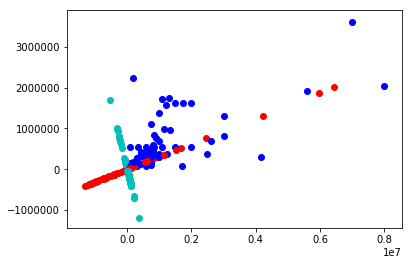

In [93]:
# PCA
data=person_df[['bonus','long_term_incentive']].dropna(how='any')
pca=PCA(n_components=2)
pca.fit(data)
print pca.explained_variance_ratio_
first_pc=pca.components_[0]
second_pc=pca.components_[1]
transformed_data=pca.transform(data)

for ii,jj in zip(transformed_data.tolist(),data.values.tolist()):
    print jj
    plt.scatter(first_pc[0]*ii[0],first_pc[1]*ii[0],color="r")
    plt.scatter(second_pc[0]*ii[1],second_pc[1]*ii[1],color="c")
    plt.scatter(jj[0],jj[1],color="b")
    


plt.show()
